In [35]:
# load libraries for data processing
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import chemometrics as cm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from chemometrics.mcr import McrAR
import chemometrics.mcr.constraint as constraint
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [37]:
# Get CSV files list from a folder
path = 'f:/GAC_KSY/spectrum/1_amaranth/data/NIR_Gachon_amaranth'
mat_files = glob.glob(path + "/*.xlsx")
df_list = (pd.read_excel(file) for file in mat_files)
df = pd.concat(df_list, ignore_index=False, axis = 1, join = "outer")
# import data into dict
data = {}s
for file in mat_files:
    data[file.split("/")[-1].replace(".xlsx","").replace('NIR_Gachon_amaranth\\Gachon_','')] = pd.read_excel(file, index_col=0)



In [52]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,450,451,452,453,454,455,456,457,458,459
Cm-1,10970.530867,10955.101147,10939.671427,10924.241707,10908.811987,10893.382267,10877.952547,10862.522827,10847.093107,10831.663387,...,4027.156900,4011.727180,3996.297461,3980.867741,3965.438021,3950.008301,3934.578581,3919.148861,3903.719141,3888.289421
E46_res32_001_230428_104059.0000,0.121523,0.121347,0.121076,0.120820,0.120748,0.120709,0.120578,0.120285,0.119881,0.119461,...,0.525453,0.531054,0.532177,0.529657,0.525041,0.519280,0.512668,0.505547,0.498406,0.492179
E46_res32_001_230428_104059.0001,0.121405,0.121314,0.120975,0.120503,0.120305,0.120303,0.120157,0.119766,0.119382,0.119086,...,0.525518,0.531167,0.532338,0.529837,0.525198,0.519421,0.512835,0.505721,0.498557,0.492350
E46_res32_001_230428_104059.0002,0.121640,0.121452,0.121084,0.120659,0.120461,0.120418,0.120366,0.120163,0.119799,0.119355,...,0.525636,0.531276,0.532435,0.529909,0.525263,0.519507,0.512946,0.505867,0.498740,0.492527
E47_res32_001_230428_105353.0000,0.121868,0.121796,0.121387,0.120852,0.120614,0.120675,0.120683,0.120337,0.119797,0.119271,...,0.474175,0.479232,0.480794,0.479535,0.476704,0.472979,0.468480,0.463461,0.458382,0.453972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E098_230612_134546.0001,0.063586,0.060386,0.057953,0.057704,0.058691,0.059455,0.059496,0.059520,0.059651,0.059527,...,0.549577,0.555185,0.556579,0.554575,0.550699,0.545709,0.539878,0.533669,0.527547,0.522365
E098_230612_134546.0002,0.063194,0.060514,0.058589,0.058680,0.059890,0.060459,0.059703,0.058919,0.058958,0.058933,...,0.550336,0.555756,0.556837,0.554629,0.550786,0.546074,0.540593,0.534620,0.528580,0.523259
E099_230612_102805.0000,0.162471,0.160218,0.158070,0.157194,0.157546,0.158213,0.157848,0.156641,0.155562,0.154392,...,0.773620,0.781278,0.784005,0.782611,0.778624,0.773037,0.766364,0.759134,0.751772,0.745284
E099_230612_102805.0001,0.159963,0.156927,0.154932,0.155207,0.156293,0.155974,0.154056,0.152516,0.152254,0.151671,...,0.774130,0.782141,0.784861,0.783296,0.779379,0.774019,0.767266,0.759616,0.751993,0.745581


In [50]:
info = {'Experiment': df.columns[1:]}
infodf = pd.DataFrame(info)
infodf['Group'] = infodf.Experiment.str.split("_").str[0]
labels = infodf['Group']
X = df.values[:,1:]

#wl = df.values[:,0]



array([10970.53086662, 10955.1011467 , 10939.67142677, 10924.24170685,
       10908.81198692, 10893.382267  , 10877.95254707, 10862.52282715,
       10847.09310722, 10831.6633873 , 10816.23366737, 10800.80394745,
       10785.37422752, 10769.9445076 , 10754.51478767, 10739.08506775,
       10723.65534782, 10708.2256279 , 10692.79590797, 10677.36618805,
       10661.93646812, 10646.5067482 , 10631.07702827, 10615.64730835,
       10600.21758842, 10584.7878685 , 10569.35814857, 10553.92842865,
       10538.49870872, 10523.0689888 , 10507.63926888, 10492.20954895,
       10476.77982903, 10461.3501091 , 10445.92038918, 10430.49066925,
       10415.06094933, 10399.6312294 , 10384.20150948, 10368.77178955,
       10353.34206963, 10337.9123497 , 10322.48262978, 10307.05290985,
       10291.62318993, 10276.19347   , 10260.76375008, 10245.33403015,
       10229.90431023, 10214.4745903 , 10199.04487038, 10183.61515045,
       10168.18543053, 10152.7557106 , 10137.32599068, 10121.89627075,
      

ValueError: x and y must have same first dimension, but have shapes (460,) and (964,)

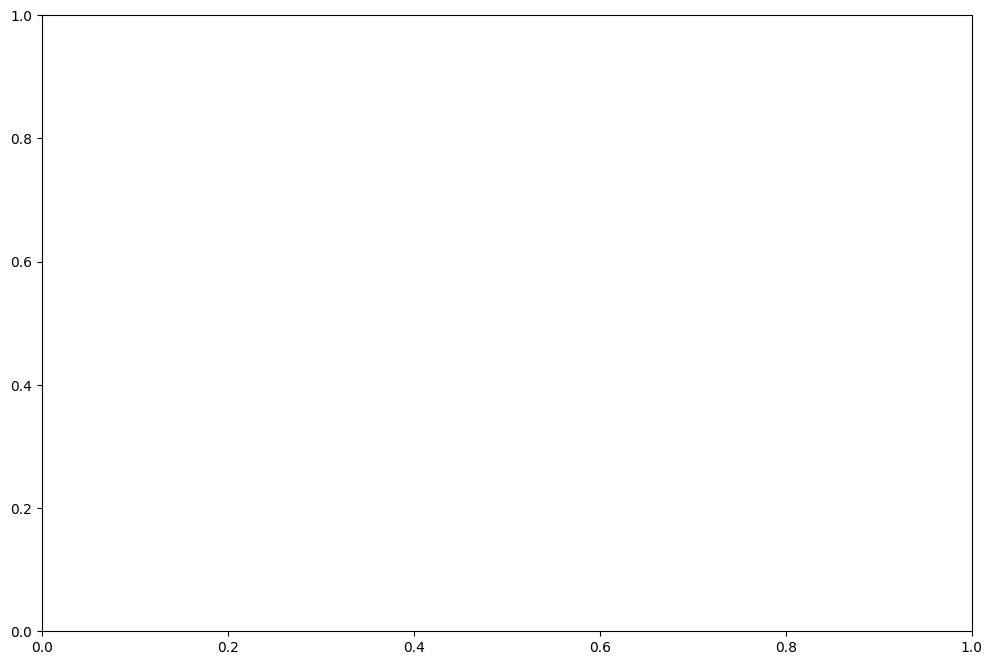

In [49]:


fig = plt.figure(figsize=(12, 8))
lines = cm.plot_colored_series(X, wl)
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')

In [36]:
# Get CSV files list from a folder
path = 'f:/GAC_KSY/spectrum/1_amaranth/data/NIR_Gachon_amaranth'
mat_files = glob.glob(path + "/*.xlsx")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_excel(file) for file in mat_files)

# Concatenate all DataFrames
df   = pd.concat(df_list, ignore_index=True)

C:\Users\somrs\AppData\Local\Temp\ipykernel_25332\377670853.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  wavelengths = np.arange(min(Y), max(Y), 1)


Text(0, 0.5, 'Absorbance / mAU')

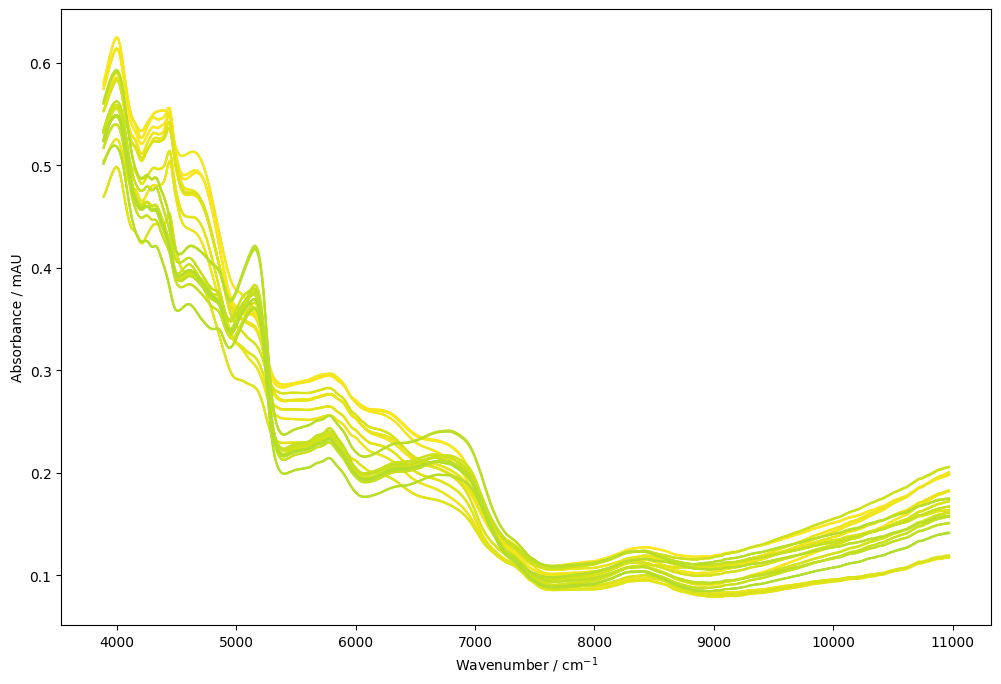

In [29]:

W = df_list[1]
X = W.iloc[:,1:].values
Y = W.iloc[:, 0].values[:, None]
wavelengths = np.arange(min(Y), max(Y), 1)
fig = plt.figure(figsize=(12, 8))
lines = cm.plot_colored_series(X,  x = Y[:, 0], reference=Y[:, 0])
plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
plt.ylabel('Absorbance / mAU')

Text(0, 0.5, '$d^2A/dl^2$ / $mAU/nm^2$')

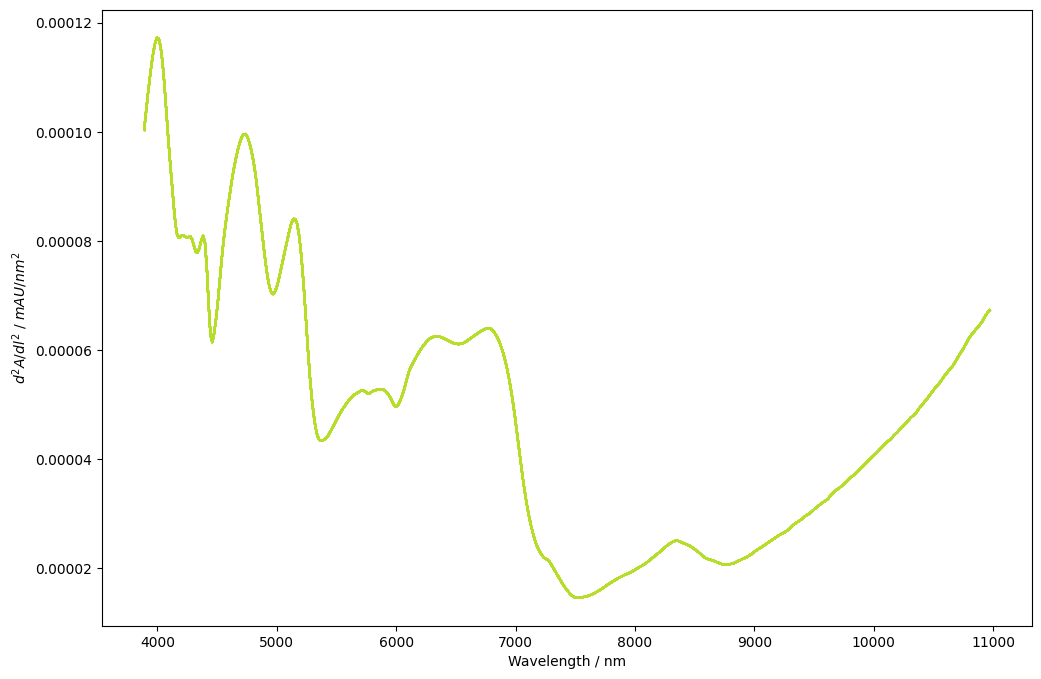

In [20]:
X_deriv = cm.Whittaker(constraint_order=3, deriv=2).fit_transform(X)

fig = plt.figure(figsize=(12, 8))
lines = cm.plot_colored_series(X_deriv,x=Y[:, 0],reference=Y[:, 0])
plt.xlabel('Wavelength / nm')
plt.ylabel('$d^2A/dl^2$ / $mAU/nm^2$')

### Selecting the number of components
스펙트럼에 기여하는 구성요소 수를 구하기위해 SVD를 사용 구성 요소 수에 따라 분산이 얼마나 설명되는 지를 조사 cm.plot_svd 를 사용하여 특이 벡터와 고유값(전자는 구성 및 스펙트럼, 후자 분산 해당)을 얻음

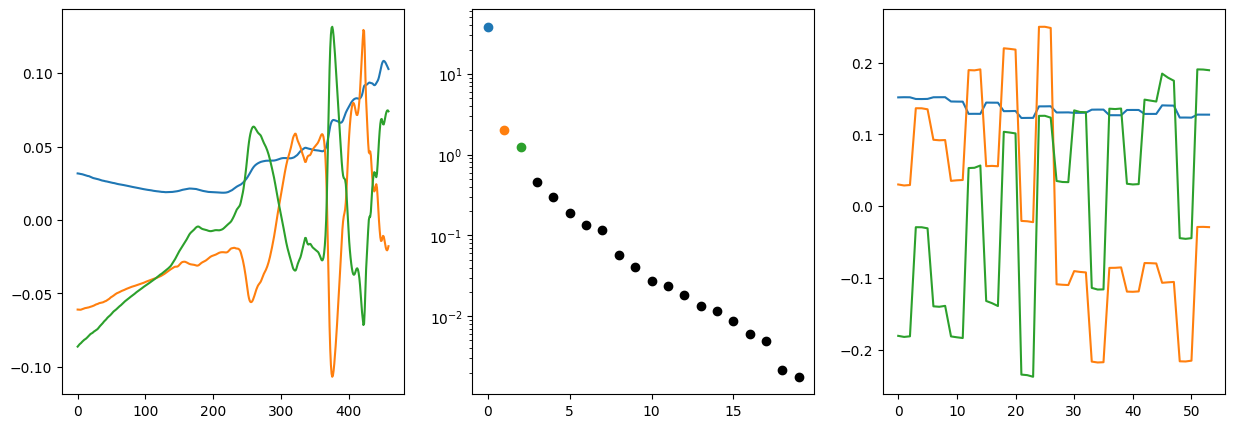

In [30]:
cm.plot_svd(X, n_comp = 3)

### Fitting an MCR model
MCR 모델을 맞추려면 초기 농도 추정치를 생성해야 합니다(기술적으로 스펙트럼 추정치를 사용할 수도 있습니다. 절차는 동일합니다). 계량화학에서 구현된 알고리즘의 안정적인 수렴을 위해서는 합리적인 시작 추정값 을 선택하는 것이 중요합니다 C. 위에서 관찰한 것처럼 데이터의 분산을 설명하려면 세 가지 구성 요소가 필요합니다. 잘린 SVD의 출력을 사용합니다. 그러나 왼쪽 특이 행렬에는 음수 항목이 포함되어 있으므로 벡터의 절대값을 가져와 왼쪽 특이 행렬의 가장 큰 항목이 1이 되도록 스케일링합니다.

In [31]:
# construct initial concentration estimate
from sklearn.decomposition import TruncatedSVD
c_init = np.abs(TruncatedSVD(n_components=3).fit_transform(X))
c_init /= np.max(c_init)

에 대한 초기 추정치를 사용하여 C이제 초기화할 수 있습니다 McrAR. constraint.Nonneg제약 조건으로 농도 추정치와 스펙트럼 추정치에 대해 비음성을 사용합니다 . 또한 스케일링을 수정하기 위해 농도 벡터에 대한 정규화 제약 조건을 설정했습니다 constraint.Normalizer. 초기화 후 MCR 변환기가 데이터 세트에 맞춰집니다 D. 결과를 검사하기 위해 장착된 스펙트럼(빨간색)이 순수 스펙트럼(검은색 및 회색)과 함께 아래에 표시됩니다. 결과는 추정된 스펙트럼과 순수 성분 스펙트럼이 매우 잘 중첩되는 것을 보여줍니다.

In [34]:
# generate and fit MCR model
mcr = McrAR(c_constraints=[constraint.Nonneg(), constraint.Normalizer()], st_constraints=[constraint.Nonneg()])
mcr.fit(C, C=c_init)

for i in range(3):
    plt.figure(figsize=[12, 5])
    plt.plot(wavenumbers, S[:, i], 'k')
    plt.plot(wavenumbers, S, 'k', alpha=0.5)
    plt.plot(wavenumbers, mcr.ST_.T[:, i], 'r', alpha=0.8, linewidth=2)
    plt.ylabel('Absorbance / mAU')
    plt.xlabel(r'Wavenumber / $\mathrm{cm^{-1}}$')
    plt.title(substance_names[i])

NameError: name 'C' is not defined